In [1]:
from Fitter.fitter import Fitter
from Fitter.over_specification import over_specification, get_check

### The over-specification analysis is taking swaption data of 5Y tenor and 1Y expiry as an example.

### Hagan Implementation

In [2]:
# calibrate the Hagan SABR model to the input data with different equal constraints
fitter=Fitter('market_data.xlsx')
beta_check=get_check(fitter,1,[0,0.3,0.5,0.7,1])
rho_check=get_check(fitter,2,[0,-0.3,-0.5,-0.7,-0.9])
alpha_check=get_check(fitter,0,[0.1,0.3,0.5])
vega_check=get_check(fitter,3,[0.2,0.4,0.6])

**Beta Testing**

The aim is this overspecification test is to quantify the calibration quality of the Hagan approximations, and how this would be influenced by the particular $\beta$ parameter. With $\beta$ fixed, we calibrate another three parameters: $\alpha$, $\rho$ and $\nu$. We have repeated the calibration using:

$\beta=0,$

$\beta=0.3,$

$\beta=0.5,$

$\beta=0.7,$

$\beta=1.$

From the plot below, it seems that the main effect of $\beta$ is a change in the smile slope, which tend to get more pronounced as $\beta$ moves from 1 to 0 (representing a switch from lognormal to normal) even if the effect is rather slight.

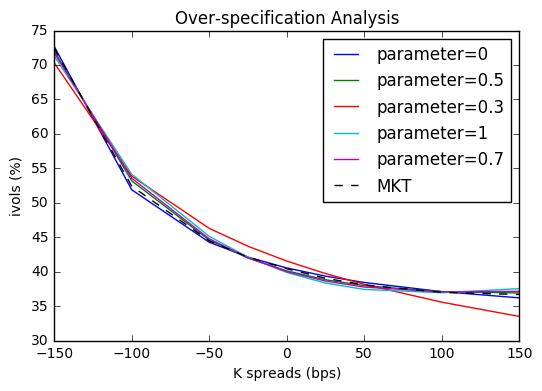

In [3]:
# conduct over-specification analysis on parameter beta
over_specification(fitter,beta_check)

In [4]:
for fix_no in [0,0.3,0.5,0.7,1]: # print fitted params with beta fixed to specific nos
    results=fitter.calibration(eqc=[1,fix_no])
    print ('params fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))

params fitted: alpha=0.007468, beta=0.000000, rho=0.617032, nu=0.334107.
params fitted: alpha=0.070743, beta=0.300000, rho=-0.906432, nu=4.258264.
params fitted: alpha=0.146298, beta=0.500000, rho=-0.884031, nu=3.699219.
params fitted: alpha=0.119560, beta=0.700000, rho=-0.241131, nu=0.525561.
params fitted: alpha=0.399973, beta=1.000000, rho=-0.433325, nu=0.645032.


**Rho Testing**

Same calibration process is applied to $\rho$ using:

$\rho=0,$

$\rho=-0.3,$

$\rho=-0.5,$

$\rho=-0.7,$

$\rho=-0.9.$

The smile curve is relatively steeper and of less convexity for rho closer to -1. And the effects of $\rho$ and of $\beta$ are similar，both are on the smile slope.

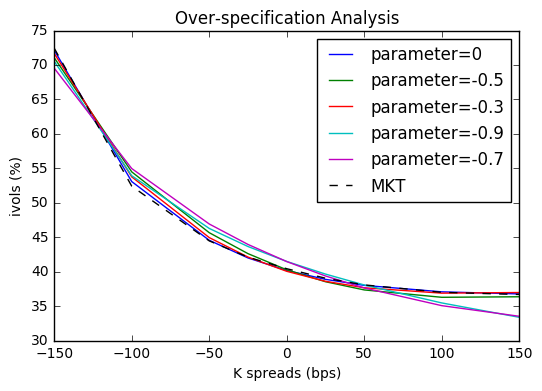

In [5]:
# conduct over-specification analysis on parameter rho
over_specification(fitter, rho_check)

In [6]:
for fix_no in [0,-0.3,-0.5,-0.7,-0.9]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[2,fix_no])
    print ('params fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))

params fitted: alpha=0.041573, beta=0.435146, rho=0.000000, nu=0.438625.
params fitted: alpha=0.151056, beta=0.757550, rho=-0.300000, nu=0.538424.
params fitted: alpha=0.407412, beta=1.000000, rho=-0.500000, nu=0.611262.
params fitted: alpha=0.428228, beta=1.000000, rho=-0.700000, nu=0.500947.
params fitted: alpha=0.024910, beta=0.294827, rho=-0.900000, nu=0.001000.


**Alpha Testing**

Same calibration process is applied to $\alpha$ using:

$\alpha=0.2,$

$\alpha=0.4,$

$\alpha=0.6$

Alpha moves up and down the ivol smile with almost no changes on the smile shape.

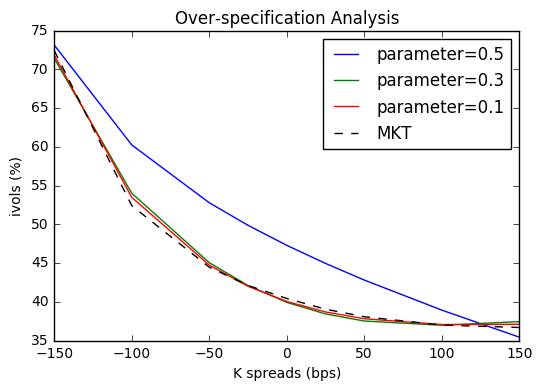

In [7]:
# conduct over-specification analysis on parameter alpha
over_specification(fitter, alpha_check)

In [8]:
for fix_no in [0.1,0.3,0.5]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[0,fix_no])
    print ('params fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))

params fitted: alpha=0.100000, beta=0.655343, rho=-0.205524, nu=0.509771.
params fitted: alpha=0.300000, beta=0.928691, rho=-0.395406, nu=0.613552.
params fitted: alpha=0.500000, beta=1.000000, rho=-0.999000, nu=0.386619.


**Vega Testing**

Same calibration process is applied to $\nu$ using:

$\nu=0.2,$

$\nu=0.4,$

$\nu=0.6$

Slight impact as vega has on the ivol smile, it does change the smile shape. It seems that higher vega leads to higher ivols for deep-in-the-money and out-of-the-money options.

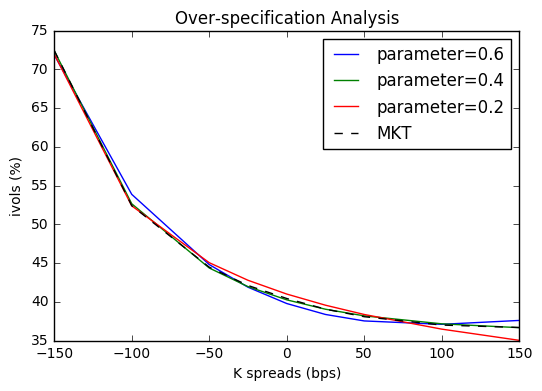

In [9]:
# conduct over-specification analysis on parameter vega
over_specification(fitter, vega_check)

In [10]:
for fix_no in [0.2,0.4,0.6]: # print fitted params with different equal constraints
    results=fitter.calibration(eqc=[3,fix_no])
    print ('params fitted: alpha=%f, beta=%f, rho=%f, nu=%f.'%(results['alpha'][10],results['beta'][10],results['rho'][10],results['nu'][10]))

params fitted: alpha=0.007586, beta=0.000000, rho=0.888567, nu=0.200000.
params fitted: alpha=0.020930, beta=0.262340, rho=0.212221, nu=0.400000.
params fitted: alpha=0.222126, beta=0.855801, rho=-0.335230, nu=0.600000.


### Obloj Implementation 

In [11]:
# calibrate the Obloj SABR model to the input data with different equal constraints
beta_check=get_check(fitter,1,[0,0.3,0.5,0.7,1],method='Obloj')
rho_check=get_check(fitter,2,[0,-0.3,-0.5,-0.7,-0.9],method='Obloj')
alpha_check=get_check(fitter,0,[0.1,0.3,0.5],method='Obloj')
vega_check=get_check(fitter,3,[0.2,0.4,0.6],method='Obloj')

/Users/huangxingyue/Desktop/NYU MFE/12 Capstone/Pricing/SABR.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  sigma=nu*logFK/math.log((math.sqrt(1-2*rho*z+z*z)+z-rho)/(1-rho))


ValueError: math domain error